<a href="https://colab.research.google.com/github/Harun2703/Python/blob/master/ICP-10/SourceCode/DL2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [6]:
# Features and Target Extraction
reviews = df['review'].values
y = df['label'].values

In [7]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(reviews)

In [8]:
# getting the vocabulary of data
reviews_mat = tokenizer.texts_to_matrix(reviews)

In [9]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(reviews_mat, y, test_size=0.25, random_state=1000)

In [10]:
# Assigning Input Dimension value
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [11]:
#  Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 7s 96us/step - loss: 0.8814 - acc: 0.5026 - val_loss: 0.8401 - val_acc: 0.5140
Epoch 2/5
75000/75000 [==============================] - 7s 94us/step - loss: 0.7913 - acc: 0.5770 - val_loss: 0.8419 - val_acc: 0.5179
Epoch 3/5
75000/75000 [==============================] - 7s 94us/step - loss: 0.6967 - acc: 0.6687 - val_loss: 0.8630 - val_acc: 0.5124
Epoch 4/5
75000/75000 [==============================] - 7s 93us/step - loss: 0.5166 - acc: 0.8013 - val_loss: 0.9401 - val_acc: 0.5129
Epoch 5/5
75000/75000 [==============================] - 7s 92us/step - loss: 0.3070 - acc: 0.9156 - val_loss: 1.0689 - val_acc: 0.5115


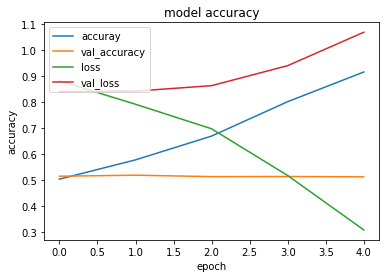

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

# Adding Embedding Layer

In [13]:
# Pre processing for Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureReviews = df['review'].values
max_review_len= max([len(s.split()) for s in pureReviews])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureReviews)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [15]:
# Model implementation with Embedding Layer
from keras.layers import Embedding, Flatten
model1 = Sequential()
model1.add(Embedding(vocab_size, 50, input_length=max_review_len))
model1.add(Flatten())
model1.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model1.add(layers.Dense(3, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=model1.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 483s 6ms/step - loss: 0.9789 - acc: 0.4917 - val_loss: 0.8765 - val_acc: 0.5000
Epoch 2/5
75000/75000 [==============================] - 489s 7ms/step - loss: 0.8273 - acc: 0.5304 - val_loss: 0.8403 - val_acc: 0.5052
Epoch 3/5
75000/75000 [==============================] - 489s 7ms/step - loss: 0.7550 - acc: 0.6047 - val_loss: 0.8610 - val_acc: 0.4932
Epoch 4/5
75000/75000 [==============================] - 490s 7ms/step - loss: 0.6280 - acc: 0.7015 - val_loss: 0.9664 - val_acc: 0.4928
Epoch 5/5
75000/75000 [==============================] - 489s 7ms/step - loss: 0.4736 - acc: 0.7967 - val_loss: 1.0986 - val_acc: 0.4786


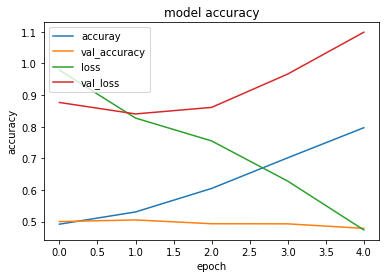

In [17]:
# Loss and Accuracy Curve after adding Embedding Layer
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [21]:
# Predicting the value
pred = model1.predict_classes(X_test[[2],:])
print("Actual test value ",y_test[1],"Predicted value", pred)

Actual test value  2 Predicted value [2]


# News Group Data Analysis

In [22]:
# Importing News Datasets
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [23]:
# Features and Target Extraction
news = twenty_train.data
y=twenty_train.target

In [24]:
# Preprocessing the data
from keras.preprocessing.sequence import pad_sequences
max_news_len= max([len(s.split()) for s in news])
vocab_size1= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(news)
padded_docs= pad_sequences(sentencesPre,maxlen=max_news_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

In [ ]:
# Model Implementation
from keras.layers import Embedding, Flatten
model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
model2.add(layers.Dense(20, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

history2 = model2.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

In [ ]:
# Loss and Accuracy Curve
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Value for test sample
pred = model.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)